In [5]:
sys.path
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

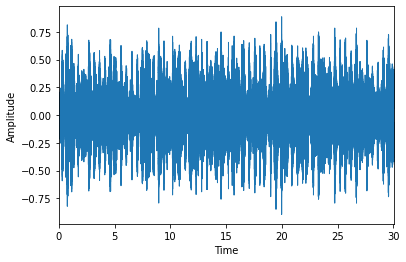

In [4]:
# waveform
# load file and specific sample rate (sr)
signal, sr = librosa.load(file, sr=22050) # sr * T -> 22050 * 30

# signal will be 1D numpy array containing number of values that are equal to the specificed sample rate * the duration (T) of the song
# each value is the amplitude of the waveform

# specifiy the signal and sample rate
librosa.display.waveplot(signal, sr=sr)

# specify labels for x and y axis
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

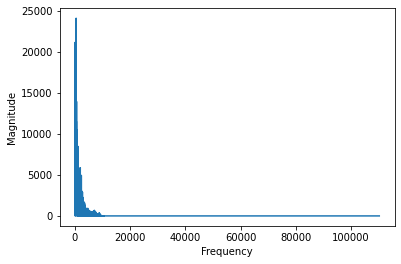

In [7]:
# fft -> spectrum
fft = np.fft.fft(signal)

# two arrays
magnitude = np.abs(fft) 
frequency = np.linspace(0, sr, len(magnitude)) # intervals are between 0 hz and the sampling rate

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.plot(left_frequency, left_magnitude)
# specify labels for x and y axis
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show() # will show powerspectrum 

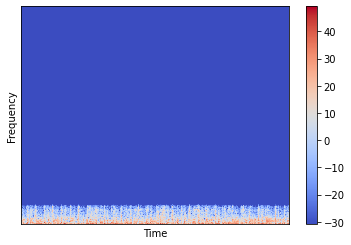

In [10]:
# stft, short term fourneir transform -> spectrogram

# number of samples per fft
n_fft = 2048 # the window that we are considering when performing a single fast fourneir transform

# the amount we are shifting each fourneir transform to the right. each time we do a transform, we slide by an interview
# the hop length tell us how much we are shifting/sliding towards the right
hop_length = 512
# 2048 and 512 are standard and customary values when doing this type of processing

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)

spectrogram = np.abs(stft) 

# taking the amplitude from the original sepctrogram, and converting to decibal
# we apply a logorithm as we do this
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# specshow allows us to display spectogram data, kind of like a heatmap
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
# specify labels for x and y axis
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

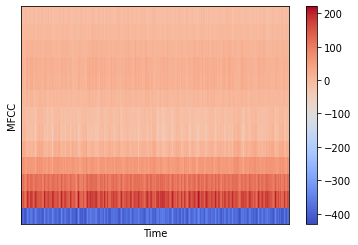

In [11]:
# MFCCs
MFCCs = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13) #n_mfcc number of coefficients we want to extract 
# the first thing we do when extracting MFCC is performing a short fourneir transform

librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
# specify labels for x and y axis
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show() # displays MFCCs over time shows how each of the 13 MFCCs evovles over time 